## Attention for students! 
This is simplified illustration of cluster analysis using python libraries without the purpose to run detailed analysis on this data.The main idea is to introduce the Python libraries that could be usefull for your computer practice N2 implementation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure


# **Read data for cluster analysis**

In [ ]:
df = pd.read_csv('california_housing_train.csv')

# **Get information and descriptive statistics about data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00
mean,-119.56,35.63,28.59,2643.66,539.41,1429.57,501.22,3.88,207300.91
std,2.01,2.14,12.59,2179.95,421.50,1147.85,384.52,1.91,115983.76
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.79,33.93,18.00,1462.00,297.00,790.00,282.00,2.57,119400.00
50%,-118.49,34.25,29.00,2127.00,434.00,1167.00,409.00,3.54,180400.00
75%,-118.00,37.72,37.00,3151.25,648.25,1721.00,605.25,4.77,265000.00
max,-114.31,41.95,52.00,37937.00,6445.00,35682.00,6082.00,15.00,500001.00


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>]], dtype=object)

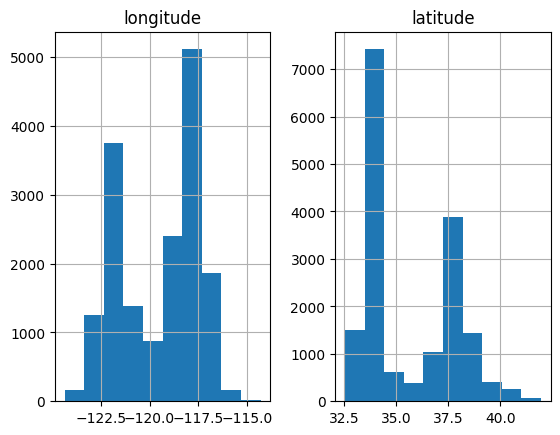

In [ ]:
df[['longitude', 'latitude']].hist()

Data sample decrease by means of sampling to simplify example

In [ ]:
from pandas.core.array_algos import replace
df_sample = df.sample(n=300, random_state=1, replace = False)

In [ ]:
print(df_sample.shape)

(300, 9)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

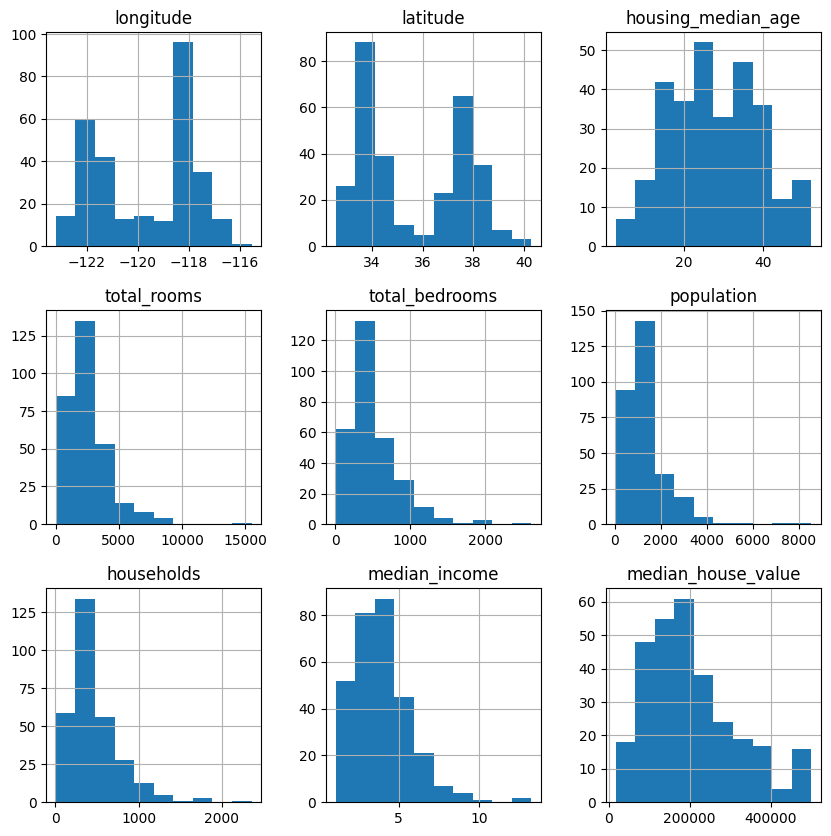

In [ ]:
df_sample[df_sample.columns].hist(figsize=(10,10)) 

In [ ]:
df_sample.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,-119.86,35.85,27.83,2691.48,545.04,1430.16,507.73,4.15,221104.06
std,2.04,2.02,11.62,1997.49,388.46,1090.12,352.30,1.70,118374.21
min,-123.20,32.75,4.00,59.00,10.00,55.00,13.00,1.06,51300.00
25%,-122.01,34.03,19.00,1654.00,310.75,818.25,290.25,2.91,152650.00
50%,-119.68,36.33,27.00,2213.00,451.00,1189.00,422.50,3.81,191600.00
75%,-118.07,37.68,36.25,3331.00,700.50,1661.00,662.75,5.31,284650.00
max,-116.86,39.23,52.00,15502.00,2613.00,7417.00,2358.00,10.27,500001.00


## **Apply Hierarchical Cluster Methods**





In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
linkage_data_ward = linkage(df_sample, method='ward', metric='euclidean')
linkage_data_centroid = linkage(df_sample, method='centroid' , metric='euclidean')
linkage_data_complete = linkage(df_sample, method='complete' , metric='euclidean')
linkage_data_single = linkage(df_sample, method='single'  , metric='euclidean')

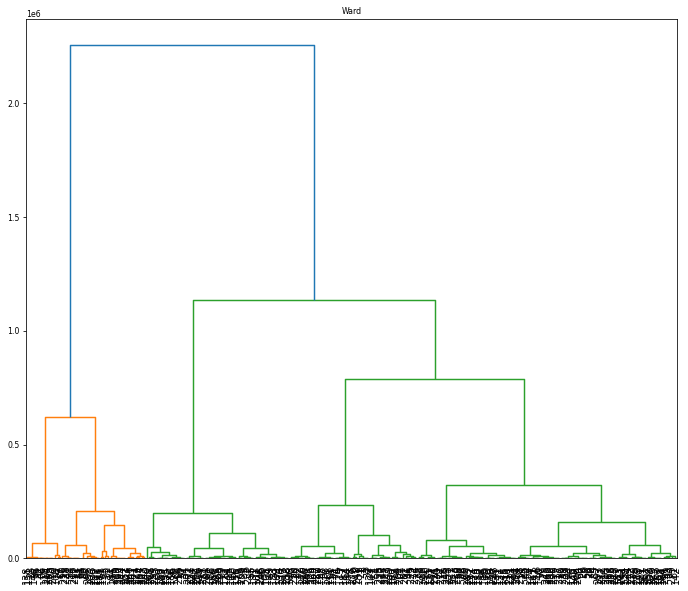

In [ ]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_ward)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title("Ward")
plt.show()

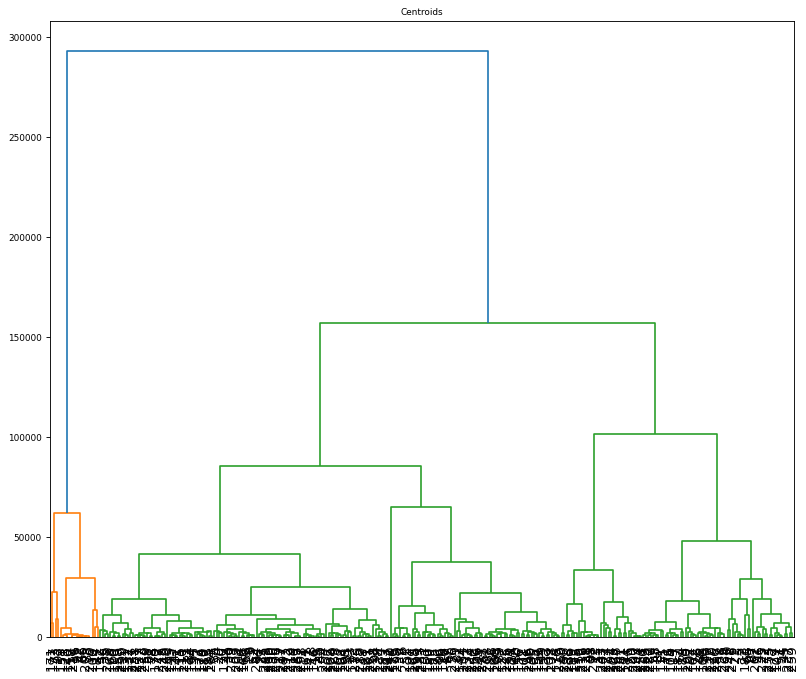

In [ ]:
figure(num=None,figsize=(12,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_centroid)
plt.title("Centroids")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

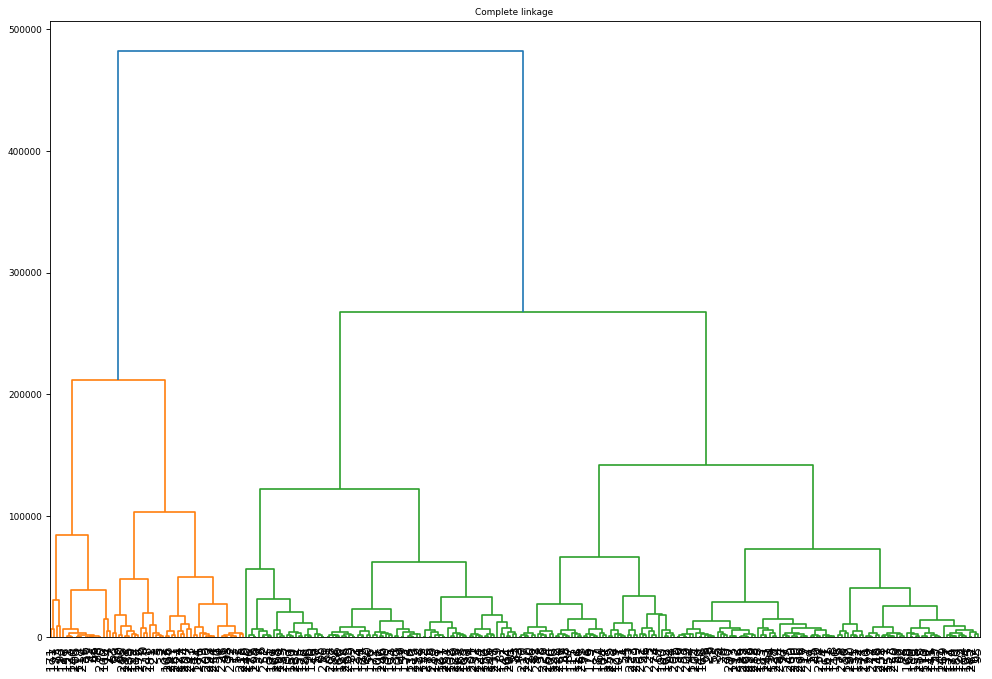

In [ ]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_complete)
plt.title("Complete linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

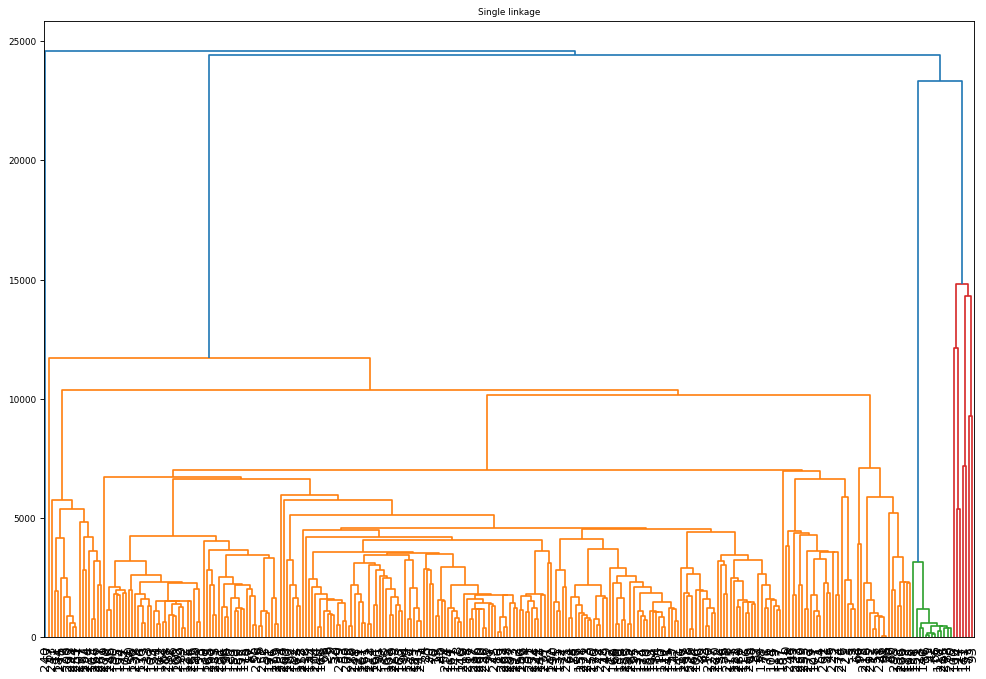

In [ ]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_single)
plt.title("Single linkage")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

Analyzing the dendrograms (Ward, Centroid, Complete linkage) I make a decision regarding number of clusters: it varies from 5 to 6 and makes sense to test both scenarios running K-means analysis, Elbow method and ANOVA. Here will be presented only one scenarion with 5 clusters. 

# K-means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Apply data standartization

In [ ]:
scaler = StandardScaler()
mat=df_sample.values
df_scaled = scaler.fit_transform(mat)

### Specify k-means parameters

In [ ]:
kmeans = KMeans(
    init = "random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

### Apply k-means on scaled data

In [ ]:
kmeans.fit(df_scaled)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

In [ ]:
labels = kmeans.labels_

### Save the labels of clusters to the dataframe. 
*The same should be applied to standardized data and run ANOVA as well*

In [ ]:
df_results=pd.DataFrame([df_sample.index, labels]).T

In [ ]:
df_sample['labels']=labels

In [ ]:
df_sample.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels
4752,-118.08,33.85,19.0,4261.0,678.0,2621.0,661.0,6.2427,288700.0,1
13348,-121.93,37.73,23.0,2564.0,347.0,1043.0,351.0,6.2048,275000.0,3
13459,-121.95,37.32,39.0,1164.0,199.0,619.0,231.0,4.6304,263200.0,4
6691,-118.29,34.07,22.0,492.0,269.0,634.0,261.0,1.6406,300000.0,2
12750,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,1
13723,-122.00,37.54,26.0,1910.0,371.0,852.0,357.0,5.8325,298900.0,3
10029,-119.78,36.30,30.0,1846.0,391.0,1255.0,352.0,2.1681,66600.0,4
14021,-122.04,36.96,44.0,1294.0,269.0,645.0,259.0,3.2437,223900.0,4
13095,-121.88,38.00,22.0,721.0,117.0,367.0,129.0,5.3098,151900.0,4
11443,-121.24,38.70,13.0,3243.0,488.0,1585.0,480.0,5.7133,166800.0,4


In [ ]:
df_sample['labels'].value_counts()

4    105
2     99
1     48
3     38
0     10
Name: labels, dtype: int64

### Clusters centroids. 
*You should run comparative analysis of centroids towards difference between clusters (the key features where you see the main difference).*

In [ ]:
kmeans.cluster_centers_

array([[ 0.09316419, -0.03817392, -0.96681445,  3.45908111,  3.41855773,
         3.30046652,  3.3779557 ,  0.26126643,  0.21097128],
       [ 0.43428624, -0.46899908, -0.45978423,  0.9648656 ,  1.14083998,
         1.0170917 ,  1.15601019, -0.15284692,  0.0833575 ],
       [ 0.88743346, -0.90826864,  0.12424336, -0.51671544, -0.46039539,
        -0.41358792, -0.47880357, -0.2096543 , -0.18024797],
       [-0.33455177,  0.05688244, -0.10346813,  0.07672258, -0.26737667,
        -0.27093382, -0.21700417,  1.67738807,  1.71239903],
       [-0.92305073,  1.05381674,  0.22256651, -0.31109514, -0.3162518 ,
        -0.29127978, -0.32019366, -0.36439031, -0.50797607]])

In [ ]:
kmeans.n_iter_

20

### Proper Number of clusters identification

In [ ]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
  }
 
   # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

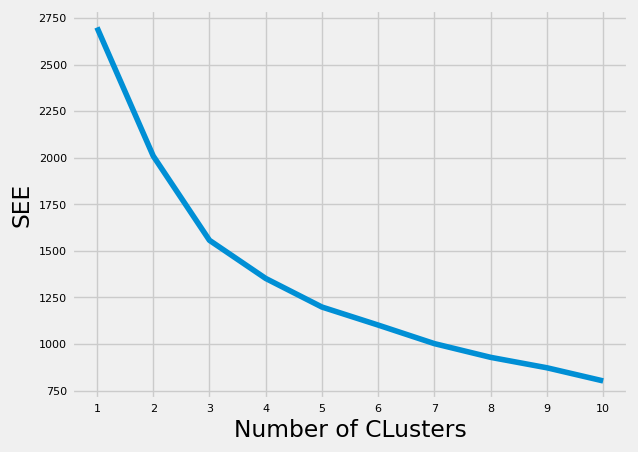

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of CLusters")
plt.ylabel("SEE")
plt.show()

### Elbow method

In [ ]:
%pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

3

In [ ]:
silhouette_coefficients = []

In [ ]:
for k in range(2, 11):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_scaled)
  score = silhouette_score(df_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

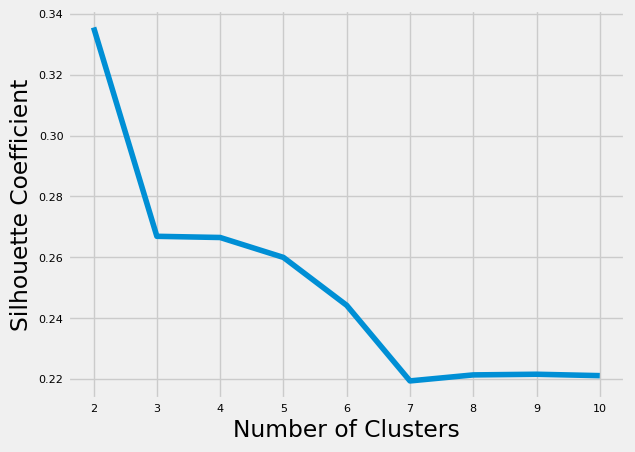

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# **ANOVA Analysis of features**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 4752 to 12271
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           300 non-null    float64
 1   latitude            300 non-null    float64
 2   housing_median_age  300 non-null    float64
 3   total_rooms         300 non-null    float64
 4   total_bedrooms      300 non-null    float64
 5   population          300 non-null    float64
 6   households          300 non-null    float64
 7   median_income       300 non-null    float64
 8   median_house_value  300 non-null    float64
 9   labels              300 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 24.6 KB


### Analysis of the significance of the difference in the average values of cluster centers
The main hypothesis that there is no any significant difference between average values of cluster centers. The hypothesis is tested by means of F test. The significance level (alpha) for decision is 0.05.

In [ ]:
model = ols('labels ~ longitude', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
longitude,106.341823,1.0,205.762563,8.197053e-26
Residual,50.648177,98.0,NaN,NaN


As PR(>F) < alpha I make a decision that there is significant difference between cluster centers by ***longitude*** feature.

In [ ]:
model = ols('labels ~ latitude', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
latitude,121.80455,1.0,339.255177,1.358758e-33
Residual,35.18545,98.0,NaN,NaN


As PR(>F) < alpha I make a decision that there is significant difference between cluster centers by ***latitude*** feature.

In [ ]:
model = ols('labels ~ housing_median_age', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
housing_median_age,7.587089,1.0,4.976708,0.027971
Residual,149.402911,98.0,NaN,NaN


As PR(>F) < alpha I make a decision that there is significant difference between cluster centers by ***housing_median_age*** feature.

In [ ]:
model = ols('labels ~ total_rooms', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
total_rooms,1.220676,1.0,0.767971,0.382989
Residual,155.769324,98.0,NaN,NaN


As PR(>F) > alpha I make a decision that there is no any significant difference between cluster centers by ***total_rooms*** feature.

In [ ]:
model = ols('labels ~ total_bedrooms', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,1.84426,1.0,1.164953,0.28309
Residual,155.14574,98.0,NaN,NaN


As PR(>F) > alpha I make a decision that there is no any significant difference between cluster centers by ***total_bedrooms*** feature.

In [ ]:
model = ols('labels ~ population', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
population,0.485906,1.0,0.304266,0.582476
Residual,156.504094,98.0,NaN,NaN


As PR(>F) > alpha I make a decision that there is no any significant difference between cluster centers by **population** feature.

In [ ]:
model = ols('labels ~ households', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
households,1.039415,1.0,0.653173,0.420938
Residual,155.950585,98.0,NaN,NaN


As PR(>F) > alpha I make a decision that there is no any significant difference between cluster centers by ***households*** feature.

In [ ]:
model = ols('labels ~ median_income', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
median_income,2.550669,1.0,1.618536,0.206307
Residual,154.439331,98.0,NaN,NaN


As PR(>F) > alpha I make a decision that there is no any significant difference between cluster centers by **median_income** feature.

In [ ]:
model = ols('labels ~ median_house_value', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
median_house_value,8.741916,1.0,5.77888,0.0181
Residual,148.248084,98.0,NaN,NaN


As PR(>F) > alpha I make a decision that there is no any significant difference between cluster centers by ***median_income*** feature.

In [ ]:
import seaborn as sns

<Axes: xlabel='labels', ylabel='median_house_value'>

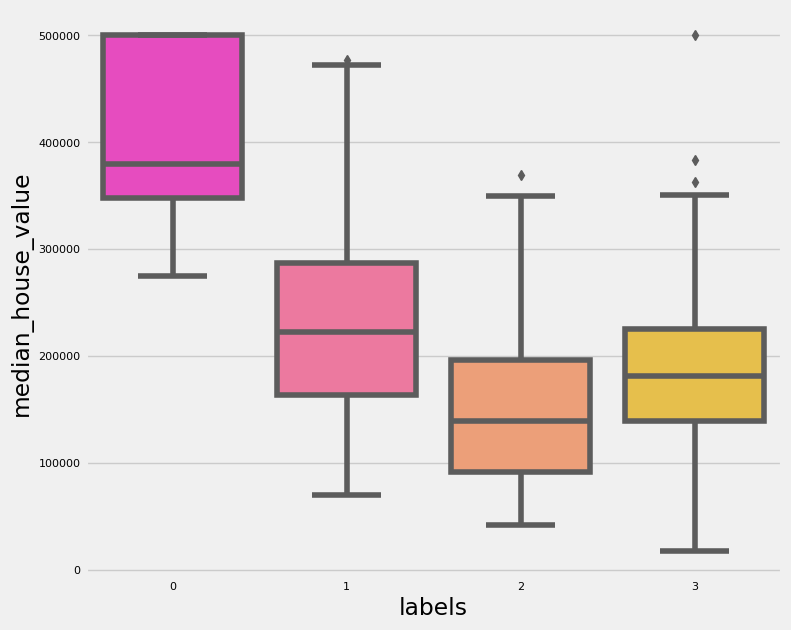

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x='labels', y='median_house_value', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='median_income'>

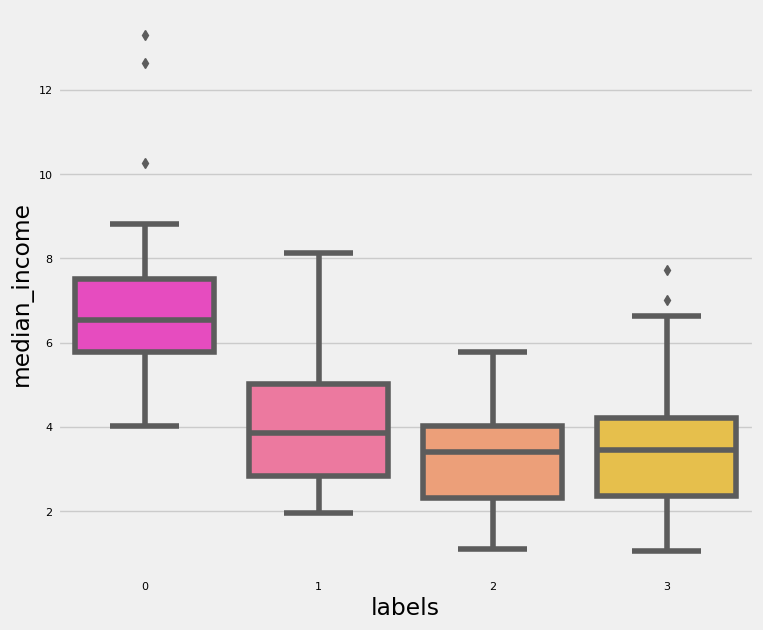

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x='labels', y='median_income', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='households'>

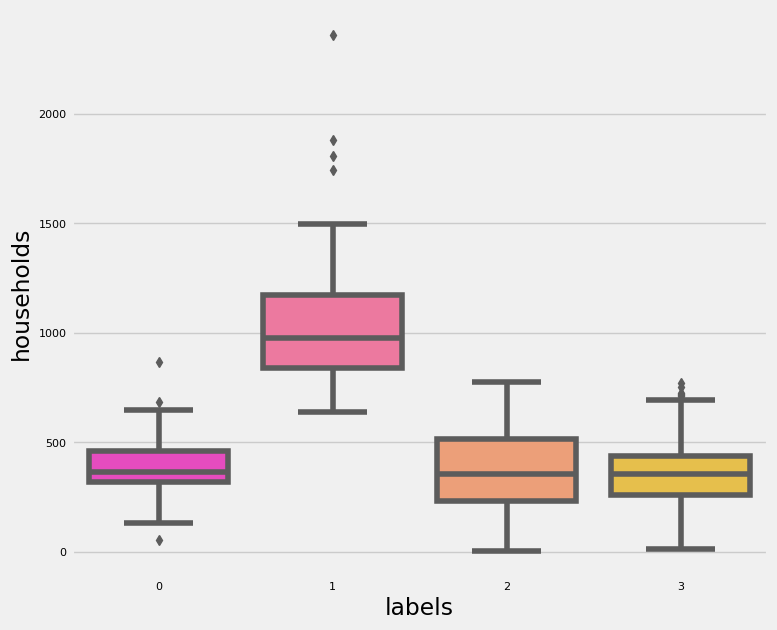

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x='labels', y='households', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='population'>

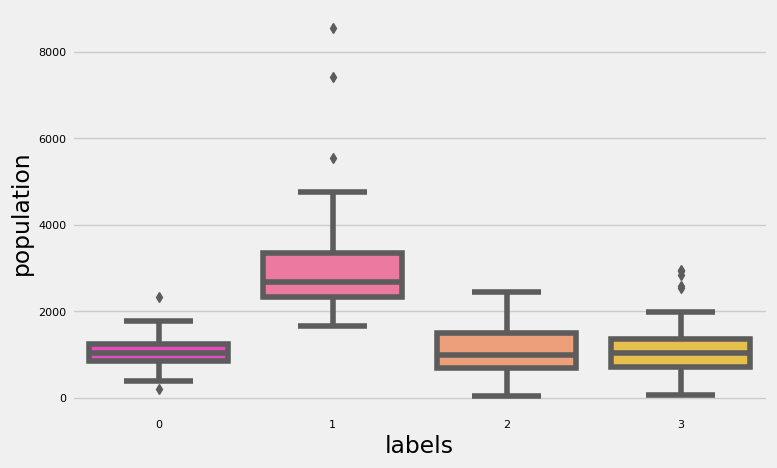

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='population', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='total_bedrooms'>

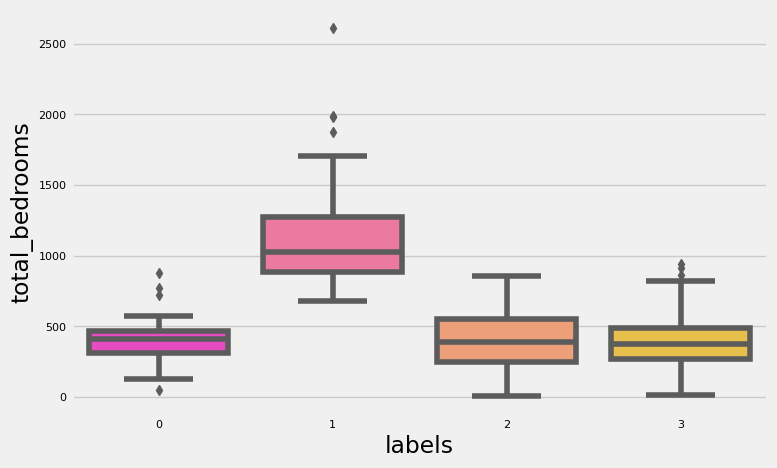

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='total_bedrooms', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='total_rooms'>

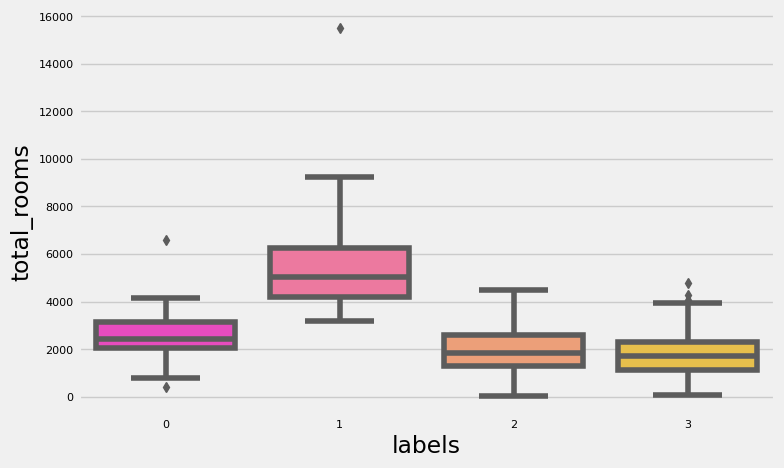

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='total_rooms', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='housing_median_age'>

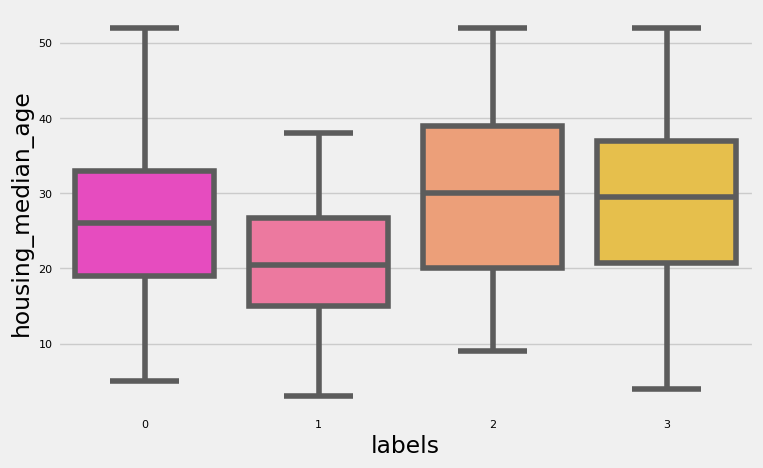

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='housing_median_age', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='latitude'>

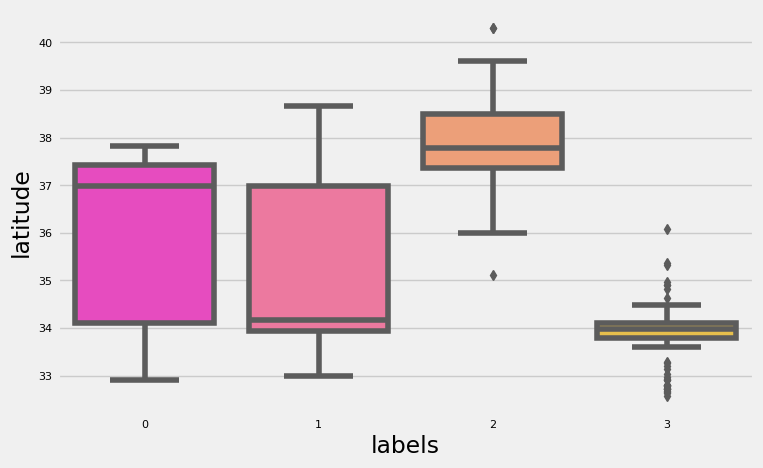

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='latitude', data=df_sample, palette='spring')

<Axes: xlabel='labels', ylabel='longitude'>

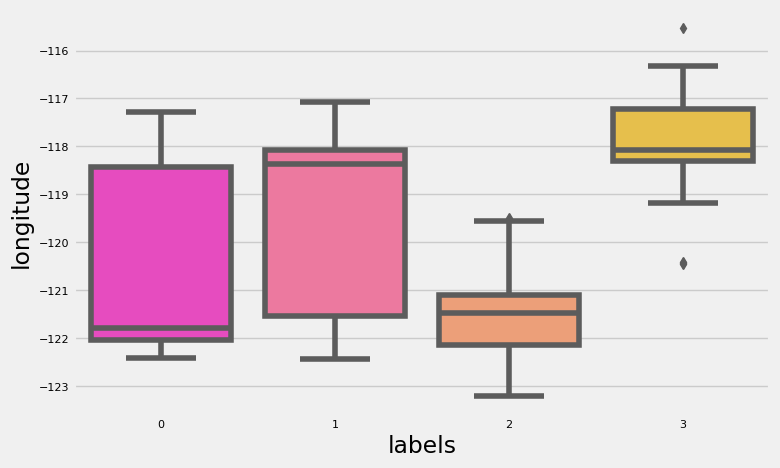

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='labels', y='longitude', data=df_sample, palette='spring')

## Attention for students! 
### It is simplified illustration of cluster analysis using python libraries without the purpose to run detailed analysis on this data. Some the steps of this analysis could be repeated several times considering various scenarious and testin your hypothesis regarding the number of clusters and their properties.